In [299]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [300]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [301]:
dataset = pd.read_csv("sample_data/AllNaturalDisasters.csv", parse_dates= True)

In [302]:
dataset.head(5)

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [303]:
#vieweing the top 5 rows within the dataframe
dataset.rename(columns = {'Number of reported natural disasters (reported disasters)':'Num'}, inplace = True)
dataset.head(5)


,Entity,Code,Year,Num
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [304]:
dataset.drop(dataset.columns.difference(['Year','Num']), 1, inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Year,Num
0,1900,5
1,1901,2
2,1902,9
3,1903,8
4,1904,2


In [305]:
year_max = dataset['Year'].max()
year_min = dataset['Year'].min()

length = year_max - year_min +1

#creating a list of years to store all year values
yr_val = dataset['Year']

dataset['Date'] = [str(yr)+'/1/1' for yr in yr_val]


dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head(5)

,Year,Num,Date
0,1900,5,1900-01-01
1,1901,2,1901-01-01
2,1902,9,1902-01-01
3,1903,8,1903-01-01
4,1904,2,1904-01-01


In [306]:
dataset.set_index('Date',inplace=True)
dataset.tail()

,Year,Num
Date,,
2014-01-01,2014,320
2015-01-01,2015,380
2016-01-01,2016,325
2017-01-01,2017,276
2018-01-01,2018,282


In [307]:
119*0.8

95.2

In [308]:
len(dataset)

119

In [309]:
train = dataset.iloc[:95,:]
test = dataset.iloc[95:,:]

In [310]:
training_set = dataset[:95].iloc[:,1:2].values
test_set = test.iloc[:,1:2].values

print(training_set[0:5])
print(test_set[0:5])

[[5]
 [2]
 [9]
 [8]
 [2]]
[[248]
 [227]
 [261]
 [288]
 [337]]


In [311]:
print(training_set.shape)
print(test_set.shape)

(95, 1)
(24, 1)


In [312]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [313]:
X_train = []
y_train = []
for i in range(2,95):
    X_train.append(training_set_scaled[i-2:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [314]:
print(X_train[0:5])
print(y_train[0:5])

[[0.01086957 0.        ]
 [0.         0.02536232]
 [0.02536232 0.02173913]
 [0.02173913 0.        ]
 [0.         0.00724638]]
[0.02536232 0.02173913 0.         0.00724638 0.05434783]


In [315]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
print(y_train.shape)

(93, 2, 1)
(93,)


In [316]:
dataset_total = pd.concat((dataset["Num"][:95],dataset["Num"][95:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 2:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(26, 1)

In [317]:
X_test = []
for i in range(2,26):
    X_test.append(inputs[i-2:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(24, 2, 1)


In [347]:
regressorGRU = Sequential()
regressorGRU.add(GRU(25, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(GRU(50, return_sequences=True))
regressorGRU.add(GRU(50))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=22,validation_split=0.15,shuffle = False)

Epoch 1/20
4/4 [==============================] - 11s 414ms/step - loss: 0.0149 - accuracy: 0.0380 - val_loss: 0.2916 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0120 - accuracy: 0.0380 - val_loss: 0.2470 - val_accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0117 - accuracy: 0.0380 - val_loss: 0.2179 - val_accuracy: 0.0000e+00
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0107 - accuracy: 0.0380 - val_loss: 0.1901 - val_accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0098 - accuracy: 0.0380 - val_loss: 0.1645 - val_accuracy: 0.0000e+00
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0100 - accuracy: 0.0380 - val_loss: 0.1388 - val_accuracy: 0.0000e+00
Epoch 7/20
4/4 [==============================] - 0s 17ms/step - loss: 0.0085 - accuracy: 0.0380 - val_loss: 0.1132 - val_accuracy: 0.0000e+

In [348]:
GRU_predicted_natdis = regressorGRU.predict(X_test)
print(GRU_predicted_natdis.shape)

GRU_predicted_natdis = sc.inverse_transform(GRU_predicted_natdis)
print(GRU_predicted_natdis.shape)

(24, 1)
(24, 1)


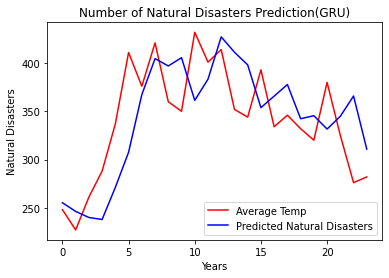

In [349]:
plt.plot(test_set, color='red',label='Average Temp')
plt.plot(GRU_predicted_natdis, color='blue',label='Predicted Natural Disasters')
plt.title('Number of Natural Disasters Prediction(GRU)')
plt.xlabel('Years')
plt.ylabel('Natural Disasters')
plt.legend()
plt.show()

In [350]:
MAP = np.mean(np.abs((test_set - GRU_predicted_natdis) / test_set)) * 100

In [351]:
print("Mean Absolute Percentage Error is",MAP)

Mean Absolute Percentage Error is 11.324247651944441


In [323]:
rmse = math.sqrt(mean_squared_error(test_set, GRU_predicted_natdis))
print("The root mean squared error is {}.".format(rmse))
p = test_set.mean()
print("The Predicted Values differs about",(rmse/p)*100, "% from the mean value")

The root mean squared error is 44.75341243200892.
The Predicted Values differs about 13.082605339442315 % from the mean value


In [324]:

temp = test_set[7:]
scaled_data = sc.transform(temp)
new_data = []

for i in range(len(scaled_data)-2):
  v = scaled_data[i:i+2]
  new_data.append(v)

new_data=np.array(new_data)
print('new_data.shape: ', new_data.shape)

new_data.shape:  (15, 2, 1)


In [325]:

GRU_predicted_futdis = regressorGRU.predict(new_data)
GRU_predicted_futdis = sc.inverse_transform(GRU_predicted_futdis)

Text(0, 0.5, 'Natural Disasters')

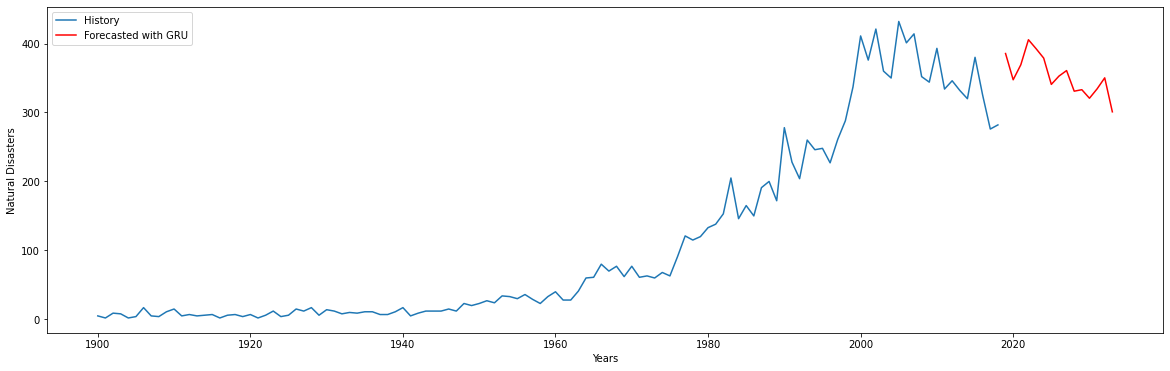

In [326]:
plt.figure(figsize=(20, 6))
    
startsize= len(dataset)
futuresize = list(range(2019, 2019 + len(GRU_predicted_futdis)))

plt.plot(1900 + np.arange(startsize), np.array(dataset['Num']), label='History')
plt.plot(futuresize, np.array(GRU_predicted_futdis),label='Forecasted with GRU', color='red')


plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Natural Disasters')

In [327]:
predicted_data = pd.DataFrame(GRU_predicted_futdis)

In [328]:
predicted_data.columns=['Number of Natural Disasters']

#Printing a year list
year_list=[]
for i in range(1,16):
  year = 2018 + i
  year_list.append(year)

print(year_list)

[2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]


In [329]:
predicted_data['Year'] = year_list

In [330]:
predicted_data.head()

,Number of Natural Disasters,Year
0,385.516815,2019
1,347.437286,2020
2,369.172089,2021
3,405.526306,2022
4,392.546417,2023


In [331]:
year_val1 = predicted_data['Year']

predicted_data['Date'] = [str(year)+'/1/1' for year in year_val1]


predicted_data['Date'] = pd.to_datetime(predicted_data['Date'])

In [332]:
predicted_data.set_index('Date',inplace=True)
predicted_data.head()

,Number of Natural Disasters,Year
Date,,
2019-01-01,385.516815,2019
2020-01-01,347.437286,2020
2021-01-01,369.172089,2021
2022-01-01,405.526306,2022
2023-01-01,392.546417,2023


In [333]:
predicted_data = predicted_data.iloc[:, [1,0]]


In [334]:
dataset1=dataset.rename(columns={'Num':'Number of Natural Disasters'})
dataset1.tail()

,Year,Number of Natural Disasters
Date,,
2014-01-01,2014,320
2015-01-01,2015,380
2016-01-01,2016,325
2017-01-01,2017,276
2018-01-01,2018,282


In [335]:
forecast_data = dataset1.append(predicted_data)

In [336]:
forecast_data.to_csv("Forecasted Natural Disaster Data.csv")

In [336]:
#Accuracy = 100 - MAP
#Accuracy = 88.67%